# Liquid/liquid equilibrium : ternary diagram and extraction

The code allow to create the ternary diagram (in weight %) for the water (diluant D), acetic acid (solute A) and ispropyl ether (solvent S).

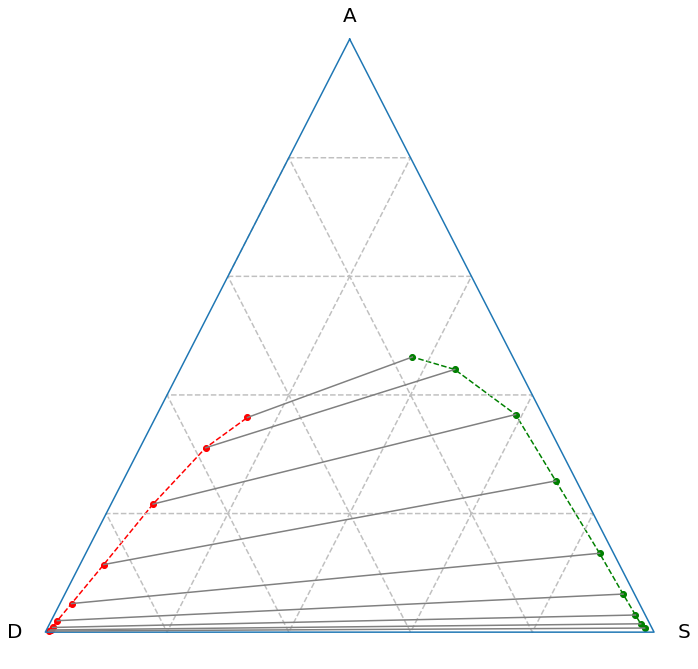

In [110]:
import numpy as np
import matplotlib.pyplot as plt
#S for solvent, A for solute and D for diluant
#SP for solvent phase DP for diluant phase
# Equilibrium data 
xA_SP=np.array([0.69,  1.41,2.89,6.42,13.3,25.5,36.7,44.3,46.4])
xS_SP=np.array([98.1 , 97.1,95.5,91.7,84.4,71.1,58.9,45.1,37.1])
xA_DP=np.array([0.18,  0.37,0.79,1.93,4.82,11.4,21.6,31.1,36.2])
xS_DP=np.array([0.5,0.7,0.8,1,1.9,3.9,6.9,10.8,15.1])

#plot of ternary diagram
def ter_diag():
    #Coordinates of based line
    xA_line=np.array([100,  0,0,100])
    xS_line=np.array([0,100,0,0])
    #Coordinates of intermediate line
    xA_uline=np.array([80, 80, 0,20,20, 0,80,60,60,0,40,40,0,60])
    xS_uline=np.array([0,  20,20,0 ,80,80, 0,0,40,40,0,60,60,0])
    #function to calculate the X,Y position in the triangle
    def tri(xA,xS):
        X=xS+xA/2
        Y=xA*np.sqrt(3)/2
        return X,Y

    bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="white", lw=1)
    fig, ax = plt.subplots(figsize = (12, 12))
    XSP,YSP=tri(xA_SP,xS_SP)
    plt.plot(XSP,YSP,color='green', marker='o', linestyle='dashed')
    XDP,YDP=tri(xA_DP,xS_DP)
    plt.plot(XDP,YDP,color='red', marker='o', linestyle='dashed')
    X,Y=tri(xA_uline,xS_uline)
    plt.plot(X,Y,'--', color='silver')
    X,Y=tri(xA_line,xS_line)
    plt.plot(X,Y)
    for i in range(len(xA_SP)):
        X=np.array([XSP[i],XDP[i]])
        Y=np.array([YSP[i],YDP[i]])
        plt.plot(X,Y, color='grey')
    ax.axis("off")
    plt.text(-5, 0, "D", ha="center", va="center", size=20, bbox=bbox_props)
    plt.text(105, 0, "S", ha="center", va="center", size=20, bbox=bbox_props)
    plt.text(50, 90, "A", ha="center", va="center", size=20, bbox=bbox_props)
    return

ter_diag()
plt.show()

One realizes 100 g of a mixture water/acid/ether with 29 g in acid and 40 g in ether. 

**How many phases will be observed ?**


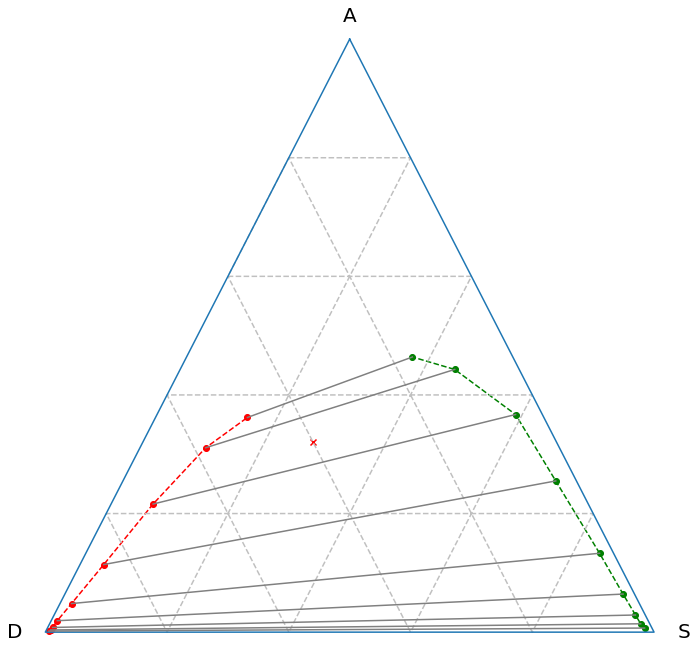

In [153]:
m_tot=100
m_A=32
m_D=40
m_S=m_tot-m_A-m_D
XA_M=100*m_A/m_tot
XS_M=100*m_S/m_tot
ter_diag()
X_M,Y_M=tri(XA_M,XS_M)
plt.scatter(X_M,Y_M, color='red', marker='x')
plt.show()


The mixture is below the spinodal curve : there will be two phases. The extraction is then possible by separating the two phases.
    
**Determine the composition of the phases and their weight.**


In [152]:
#find the two tie lines bordering the mixture 
c1=0
c2=0
for i in range(len(xA_SP)):
    if Y_M < YDP[i]+(YSP[i]-YDP[i])*(X_M-XDP[i])/(XSP[i]-XDP[i]):
        c1=i
        c2=i+1
        print ('The mixure is located between the tie lines', c1,'and',c2)
        break

#interpolation between the two tie lines



The mixure is located between the tie lines 7 and 8


In [142]:
print (len(xA_SP))

9
